In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_excel('Data_Train.xlsx')

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Problem Statement:-

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket



In [4]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [5]:
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [6]:
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [7]:
df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [8]:
df.drop('Route',axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 834.7+ KB


In [10]:
df['Destination']=df['Destination'].replace('New Delhi','Delhi')

In [11]:
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [12]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [14]:
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [15]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [16]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [17]:
df['day']=df['Date_of_Journey'].dt.day

In [18]:
df['month']=df['Date_of_Journey'].dt.month

In [19]:

df.drop('Date_of_Journey',axis=1,inplace=True)

In [20]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [21]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Source           10683 non-null  object        
 2   Destination      10683 non-null  object        
 3   Dep_Time         10683 non-null  datetime64[ns]
 4   Arrival_Time     10683 non-null  datetime64[ns]
 5   Duration         10683 non-null  object        
 6   Total_Stops      10683 non-null  object        
 7   Additional_Info  10683 non-null  object        
 8   Price            10683 non-null  int64         
 9   day              10683 non-null  int64         
 10  month            10683 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 918.2+ KB


In [23]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month
0,IndiGo,Banglore,Delhi,2022-08-28 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,2022-08-28 05:50:00,2022-08-28 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,2022-08-28 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,2022-08-28 18:05:00,2022-08-28 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,Delhi,2022-08-28 16:50:00,2022-08-28 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [24]:
df['Arrival_hour']=df['Arrival_Time'].dt.hour
df['Arrival_minute']=df['Arrival_Time'].dt.minute

In [25]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,Delhi,2022-08-28 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,2022-08-28 05:50:00,2022-08-28 13:15:00,7h 25m,2 stops,No info,7662,5,1,13,15
2,Jet Airways,Delhi,Cochin,2022-08-28 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,4,25
3,IndiGo,Kolkata,Banglore,2022-08-28 18:05:00,2022-08-28 23:30:00,5h 25m,1 stop,No info,6218,5,12,23,30
4,IndiGo,Banglore,Delhi,2022-08-28 16:50:00,2022-08-28 21:35:00,4h 45m,1 stop,No info,13302,3,1,21,35


In [26]:
df['Dep_Hour']=df['Dep_Time'].dt.hour
df['Dep_Minute']=df['Dep_Time'].dt.minute

In [27]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,Arrival_hour,Arrival_minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,Delhi,2022-08-28 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,2022-08-28 05:50:00,2022-08-28 13:15:00,7h 25m,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,2022-08-28 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,2022-08-28 18:05:00,2022-08-28 23:30:00,5h 25m,1 stop,No info,6218,5,12,23,30,18,5
4,IndiGo,Banglore,Delhi,2022-08-28 16:50:00,2022-08-28 21:35:00,4h 45m,1 stop,No info,13302,3,1,21,35,16,50


In [28]:
l=[]
l1=[]
for i in df['Duration']:
    y=i.replace("h"," ").replace("m"," ").split()
    z=int(y[0])*60
    l.append(z)
    try:
        z1=int(y[1])
        l1.append(z1)
    except IndexError:
        l1.append(0)
print(l1)

[50, 25, 0, 25, 45, 25, 30, 5, 30, 50, 15, 35, 15, 10, 35, 35, 30, 35, 0, 35, 10, 20, 50, 55, 20, 10, 45, 55, 50, 15, 15, 25, 50, 0, 30, 25, 15, 30, 15, 55, 5, 30, 5, 45, 0, 50, 50, 15, 5, 55, 15, 20, 50, 0, 50, 15, 5, 15, 30, 5, 25, 20, 15, 30, 15, 25, 50, 30, 20, 15, 25, 30, 20, 30, 0, 45, 50, 30, 5, 15, 50, 40, 10, 35, 0, 20, 25, 45, 20, 0, 15, 5, 30, 20, 35, 25, 40, 0, 25, 35, 20, 15, 30, 0, 45, 55, 10, 30, 20, 55, 0, 55, 45, 10, 55, 25, 5, 10, 40, 55, 40, 25, 5, 15, 25, 10, 10, 0, 50, 20, 0, 55, 10, 45, 0, 50, 40, 15, 45, 50, 0, 15, 25, 35, 50, 35, 25, 55, 50, 10, 20, 25, 50, 20, 15, 35, 35, 50, 45, 10, 50, 45, 15, 20, 30, 25, 30, 40, 10, 45, 35, 5, 30, 30, 10, 35, 5, 50, 0, 0, 25, 30, 30, 0, 20, 30, 45, 10, 35, 45, 55, 35, 20, 5, 40, 15, 10, 25, 50, 25, 15, 50, 15, 50, 20, 55, 35, 35, 30, 20, 55, 15, 5, 45, 55, 30, 40, 45, 55, 0, 45, 15, 25, 15, 55, 50, 25, 50, 30, 30, 40, 35, 15, 30, 45, 35, 30, 55, 55, 15, 40, 30, 0, 15, 15, 50, 10, 25, 20, 30, 10, 30, 20, 35, 15, 20, 45, 0, 0,

In [29]:
len(l1)

10683

In [30]:
len(l)

10683

In [31]:
duration=pd.DataFrame({'l':l,'l1':l1})

In [32]:
duration

,l,l1
0,120,50
1,420,25
2,1140,0
3,300,25
4,240,45
...,...,...
10678,120,30
10679,120,35
10680,180,0
10681,120,40


In [34]:

duration['Totalminute']=duration['l']+duration['l1']

In [35]:
duration.drop(columns=['l','l1'],axis=1,inplace=True)

In [36]:
df.drop('Duration',axis=1,inplace=True)

In [37]:
df['Duration']=duration['Totalminute']

In [38]:
df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,day,month,Arrival_hour,Arrival_minute,Dep_Hour,Dep_Minute,Duration
0,IndiGo,Banglore,Delhi,2022-08-28 22:20:00,2022-03-22 01:10:00,non-stop,No info,3897,24,3,1,10,22,20,170
1,Air India,Kolkata,Banglore,2022-08-28 05:50:00,2022-08-28 13:15:00,2 stops,No info,7662,5,1,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2022-08-28 09:25:00,2022-06-10 04:25:00,2 stops,No info,13882,6,9,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,2022-08-28 18:05:00,2022-08-28 23:30:00,1 stop,No info,6218,5,12,23,30,18,5,325
4,IndiGo,Banglore,Delhi,2022-08-28 16:50:00,2022-08-28 21:35:00,1 stop,No info,13302,3,1,21,35,16,50,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2022-08-28 19:55:00,2022-08-28 22:25:00,non-stop,No info,4107,4,9,22,25,19,55,150
10679,Air India,Kolkata,Banglore,2022-08-28 20:45:00,2022-08-28 23:20:00,non-stop,No info,4145,27,4,23,20,20,45,155
10680,Jet Airways,Banglore,Delhi,2022-08-28 08:20:00,2022-08-28 11:20:00,non-stop,No info,7229,27,4,11,20,8,20,180
10681,Vistara,Banglore,Delhi,2022-08-28 11:30:00,2022-08-28 14:10:00,non-stop,No info,12648,3,1,14,10,11,30,160


In [39]:
df.drop(columns=['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [40]:
df.describe()

,Price,day,month,Arrival_hour,Arrival_minute,Dep_Hour,Dep_Minute,Duration
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,12.682205,5.534775,13.348778,24.690630,12.490686,24.411214,643.120846
std,4611.359167,8.803701,2.987489,6.859125,16.506036,5.748650,18.767980,507.835322
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,75.000000
25%,5277.000000,5.000000,3.000000,8.000000,10.000000,8.000000,5.000000,170.000000
50%,8372.000000,6.000000,5.000000,14.000000,25.000000,11.000000,25.000000,520.000000
75%,12373.000000,21.000000,6.000000,19.000000,35.000000,18.000000,40.000000,930.000000
max,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,2860.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Total_Stops      10683 non-null  object
 4   Additional_Info  10683 non-null  object
 5   Price            10683 non-null  int64 
 6   day              10683 non-null  int64 
 7   month            10683 non-null  int64 
 8   Arrival_hour     10683 non-null  int64 
 9   Arrival_minute   10683 non-null  int64 
 10  Dep_Hour         10683 non-null  int64 
 11  Dep_Minute       10683 non-null  int64 
 12  Duration         10683 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 1.1+ MB


In [42]:
df[df.duplicated()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day,month,Arrival_hour,Arrival_minute,Dep_Hour,Dep_Minute,Duration
683,Jet Airways,Delhi,Cochin,2 stops,No info,13376,6,1,4,25,14,35,830
1061,Air India,Delhi,Cochin,2 stops,No info,10231,21,5,19,15,22,0,1275
1348,Air India,Delhi,Cochin,2 stops,No info,12392,18,5,19,15,17,15,1560
1418,Jet Airways,Delhi,Cochin,2 stops,In-flight meal not included,10368,6,6,4,25,5,30,1375
1674,IndiGo,Banglore,Delhi,non-stop,No info,7303,24,3,21,20,18,25,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,Delhi,Cochin,2 stops,No info,12819,27,6,12,35,23,5,810
10616,Jet Airways,Delhi,Cochin,2 stops,No info,13014,6,1,12,35,9,40,1615
10634,Jet Airways,Delhi,Cochin,2 stops,In-flight meal not included,11733,6,6,12,35,9,40,1615
10672,Jet Airways,Delhi,Cochin,2 stops,In-flight meal not included,11150,27,6,19,0,23,5,1195


In [43]:
df.drop_duplicates(keep='first',inplace=True)

In [44]:
df.shape

(10461, 13)

In [45]:
df.nunique().to_frame()

,0
Airline,12
Source,5
Destination,5
Total_Stops,5
Additional_Info,10
Price,1870
day,9
month,7
Arrival_hour,24
Arrival_minute,12


# EDA 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

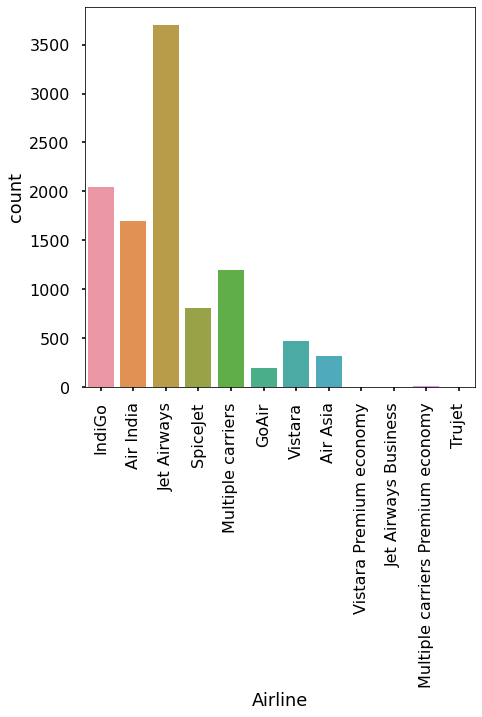

In [46]:
plt.style.use('seaborn-poster')
plt.figure(figsize=(7,7))
sns.countplot('Airline',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

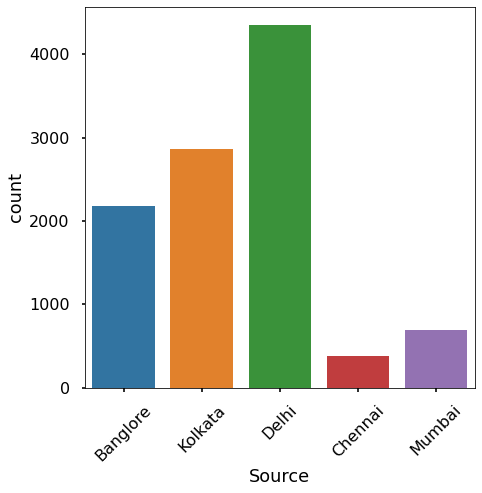

In [47]:
plt.figure(figsize=(7,7))
sns.countplot('Source',data=df)
plt.xticks(rotation=45)

### Observation:- Jet airways has high frequency and source delhi has high frequency

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Hyderabad')])

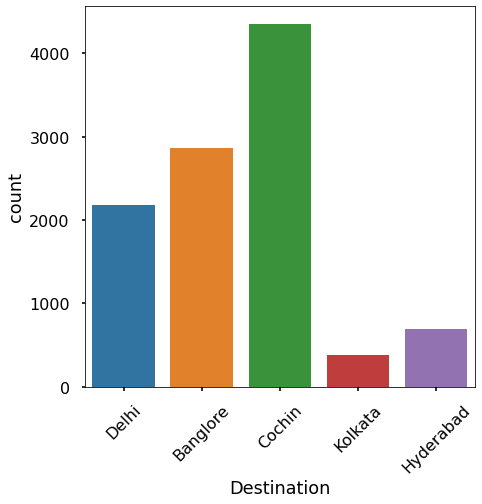

In [48]:
plt.figure(figsize=(7,7))
sns.countplot('Destination',data=df)
plt.xticks(rotation=45)

### Observation:- Destination cochin has high frequency

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

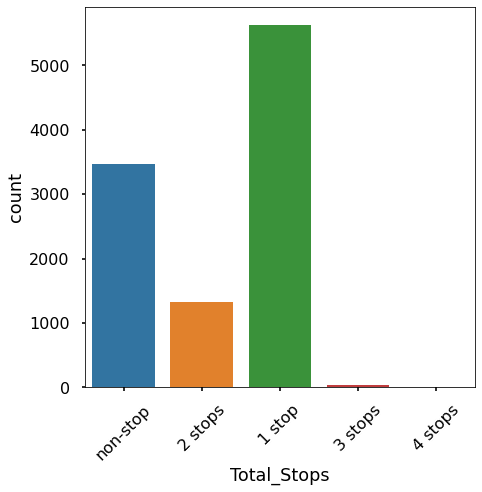

In [49]:
plt.figure(figsize=(7,7))
sns.countplot('Total_Stops',data=df)
plt.xticks(rotation=45)

### Observation:- Maximum flight having 1 stop frequency

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

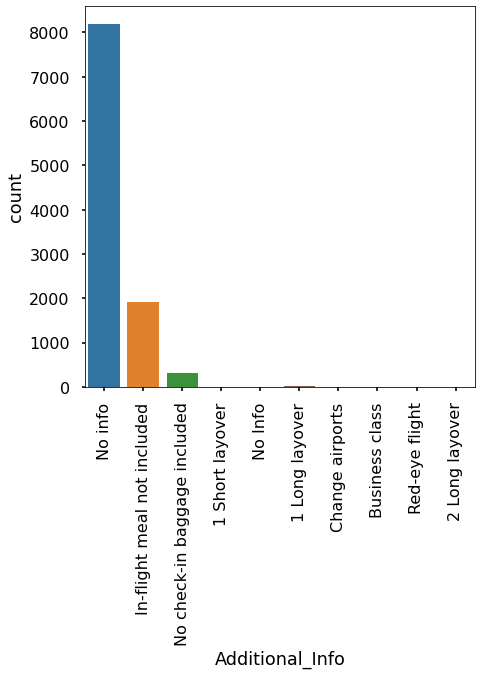

In [50]:
plt.figure(figsize=(7,7))
sns.countplot('Additional_Info',data=df)
plt.xticks(rotation=90)

### Observation:- No info frequency is high and it does give any information so dropping the column

In [51]:
df.drop('Additional_Info',axis=1,inplace=True)

<Figure size 1080x1080 with 0 Axes>

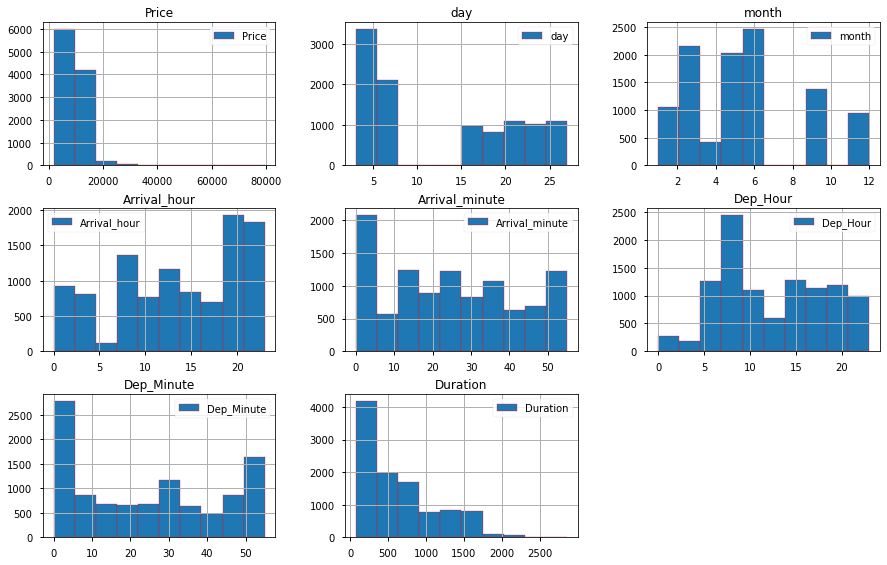

In [52]:
plt.style.use('seaborn-notebook')
plt.figure(figsize=(15,15))
df.hist(figsize=(15,30),edgecolor='red',layout=(9,3),legend=True)
plt.show()


### Observation:-

1. The most of the price lies between 0 to 10000 has higher frequency.

2. Day of the journey is between 0 to 5 has high frequency.

3. Month of the journey is bimodal has frequency 2 to 3 and 4 to 6.

4. Arival hour is between 20 to 21.

5. Arrival minute is 0 to 5 

6. Dep hour is most between 6 to 7 hour of day

7. Dep minute is most between 0 to 5.

8. Duration is between 0 to 500 minute.

# Bivariate Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

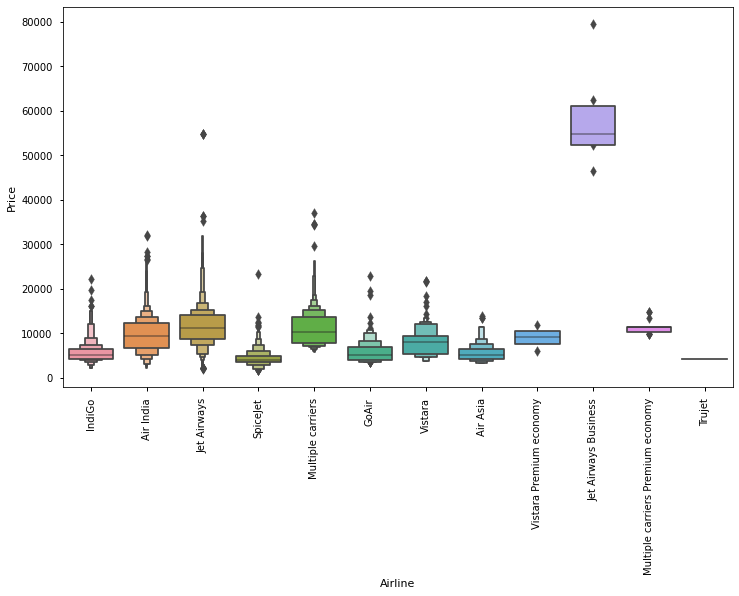

In [53]:
plt.figure(figsize=(12,7))
sns.boxenplot(x='Airline',y='Price',data=df)
plt.xticks(rotation=90)

### Observation:- Jet Airways seems to be higher price

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

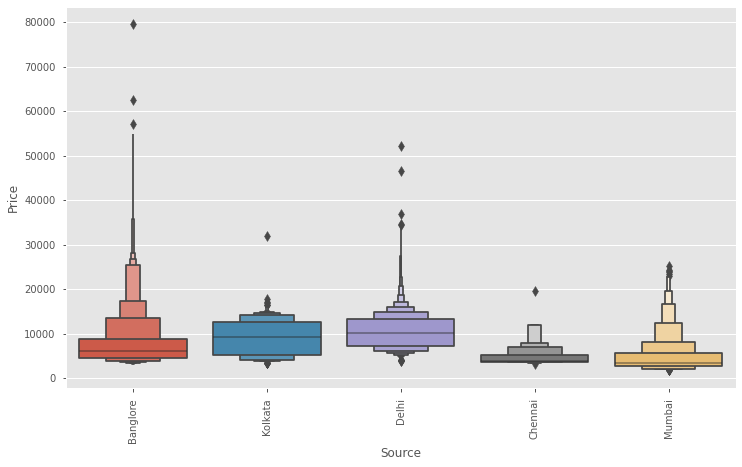

In [54]:
plt.style.use('ggplot')
plt.figure(figsize=(12,7))
sns.boxenplot(x='Source',y='Price',data=df)
plt.xticks(rotation=90)

### Observation:- Since the observation of source delhi is more so the price high but banglore seems to have some expensive flights

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Hyderabad')])

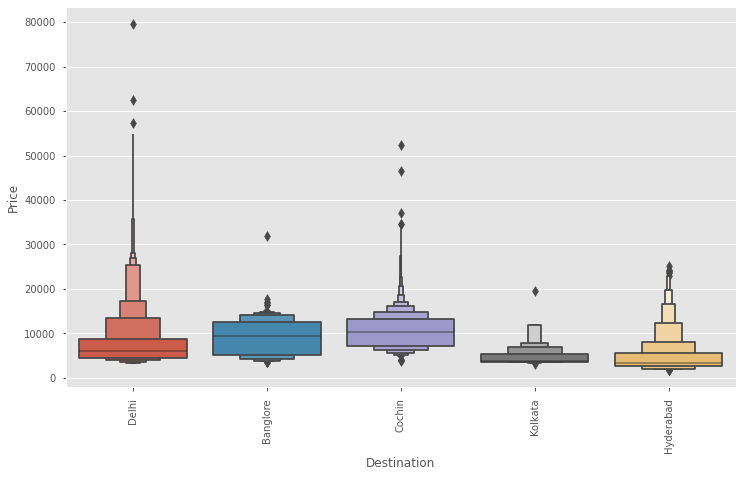

In [55]:
plt.style.use('ggplot')
plt.figure(figsize=(12,7))
sns.boxenplot(x='Destination',y='Price',data=df)
plt.xticks(rotation=90)

### Observation:- The destination delhi having higher price

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

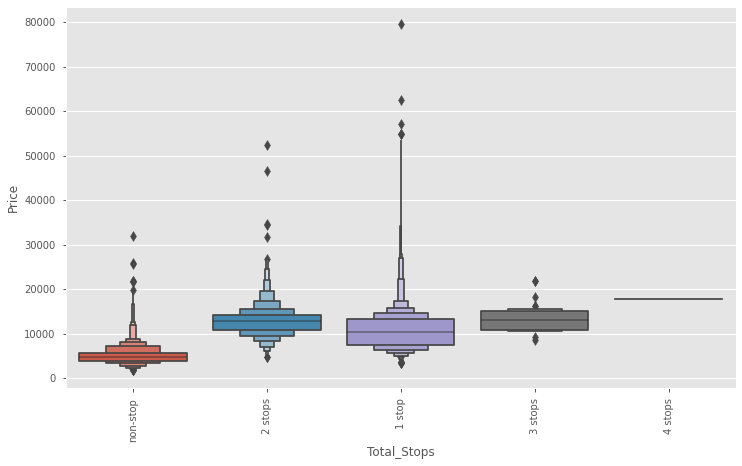

In [56]:
plt.figure(figsize=(12,7))
sns.boxenplot(x='Total_Stops',y='Price',data=df)
plt.xticks(rotation=90)

### Observation:- As the number of stop increases the price also increases

(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

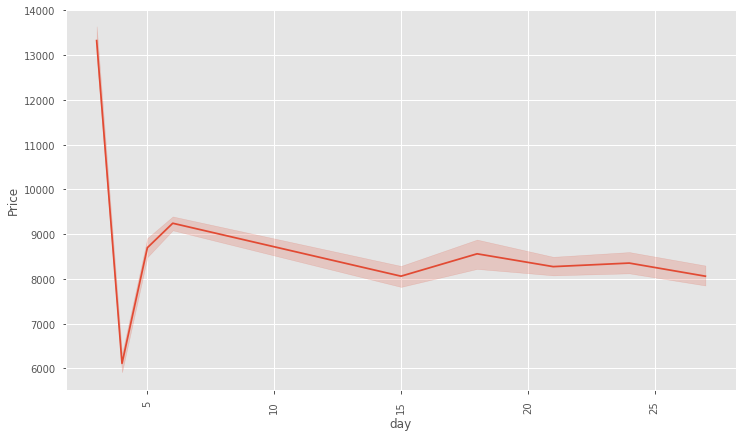

In [57]:
plt.figure(figsize=(12,7))
sns.lineplot(x='day',y='Price',data=df)
plt.xticks(rotation=90)

### Observation:- In the begining of the month the rate of flight is high.

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

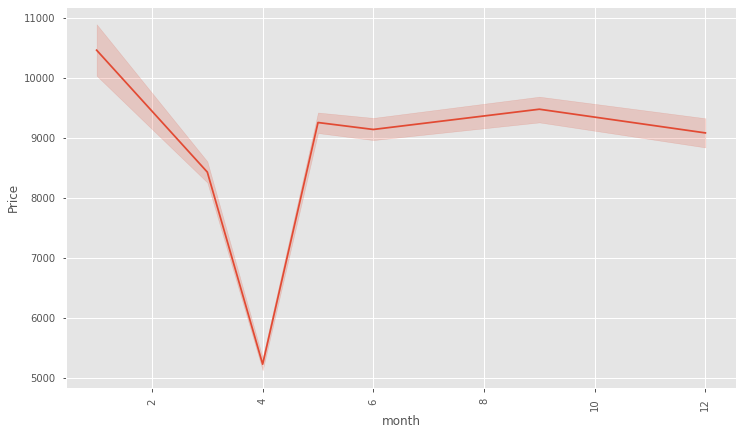

In [58]:
plt.figure(figsize=(12,7))
sns.lineplot(x='month',y='Price',data=df)
plt.xticks(rotation=90)

### Observation:- The fight rate in winter as well after summer increases

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

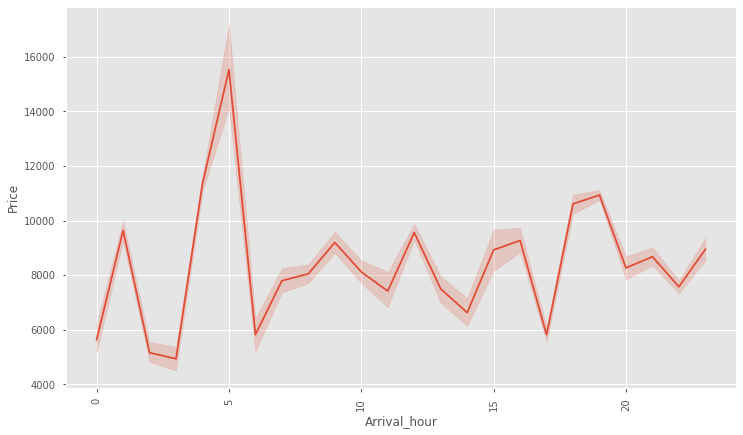

In [59]:
plt.figure(figsize=(12,7))
sns.lineplot(x='Arrival_hour',y='Price',data=df)
plt.xticks(rotation=90)

### Observation:- The arrival hour between 4 to 5 has highest price

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

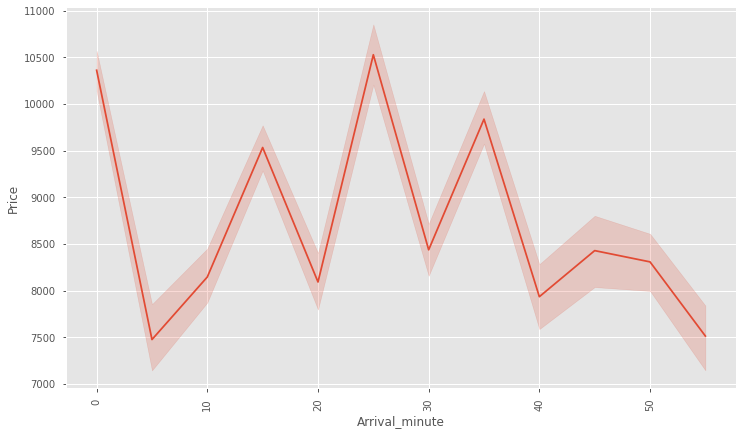

In [60]:
plt.figure(figsize=(12,7))
sns.lineplot(x='Arrival_minute',y='Price',data=df)
plt.xticks(rotation=90)

### Observation:- The arrival minute of 25 has highest price

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

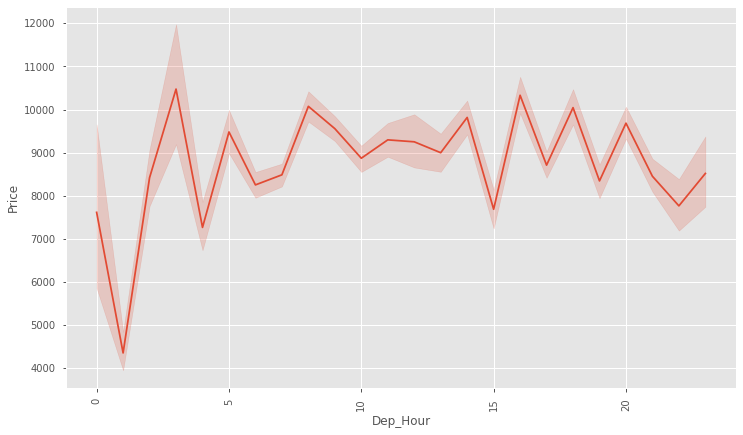

In [61]:
plt.figure(figsize=(12,7))
sns.lineplot(x='Dep_Hour',y='Price',data=df)
plt.xticks(rotation=90)

### Observation:- The Dep hour between 3 to 4 has more price

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

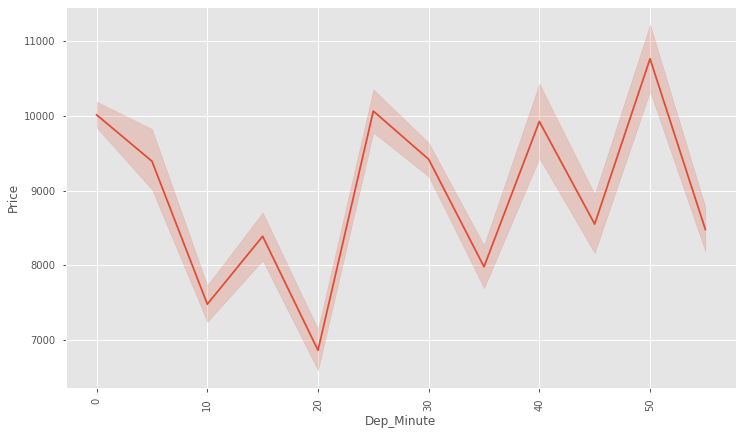

In [62]:
plt.figure(figsize=(12,7))
sns.lineplot(x='Dep_Minute',y='Price',data=df)
plt.xticks(rotation=90)

### Observation:- At 50 minute the price of the flight is high

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

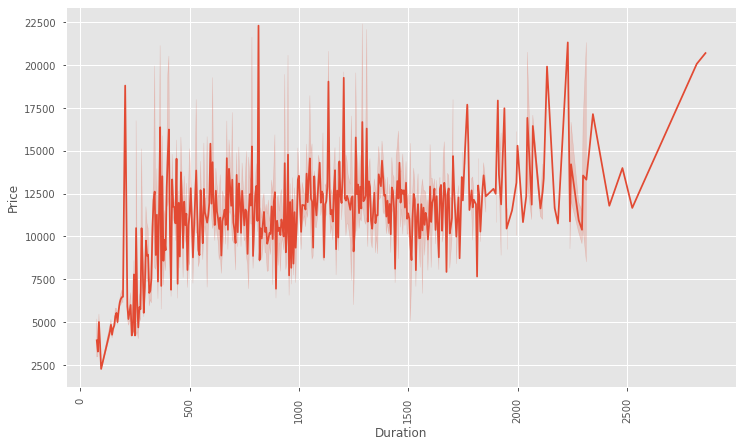

In [63]:
plt.figure(figsize=(12,7))
sns.lineplot(x='Duration',y='Price',data=df)
plt.xticks(rotation=90)

### Observation:- As duration increases the flight price increases

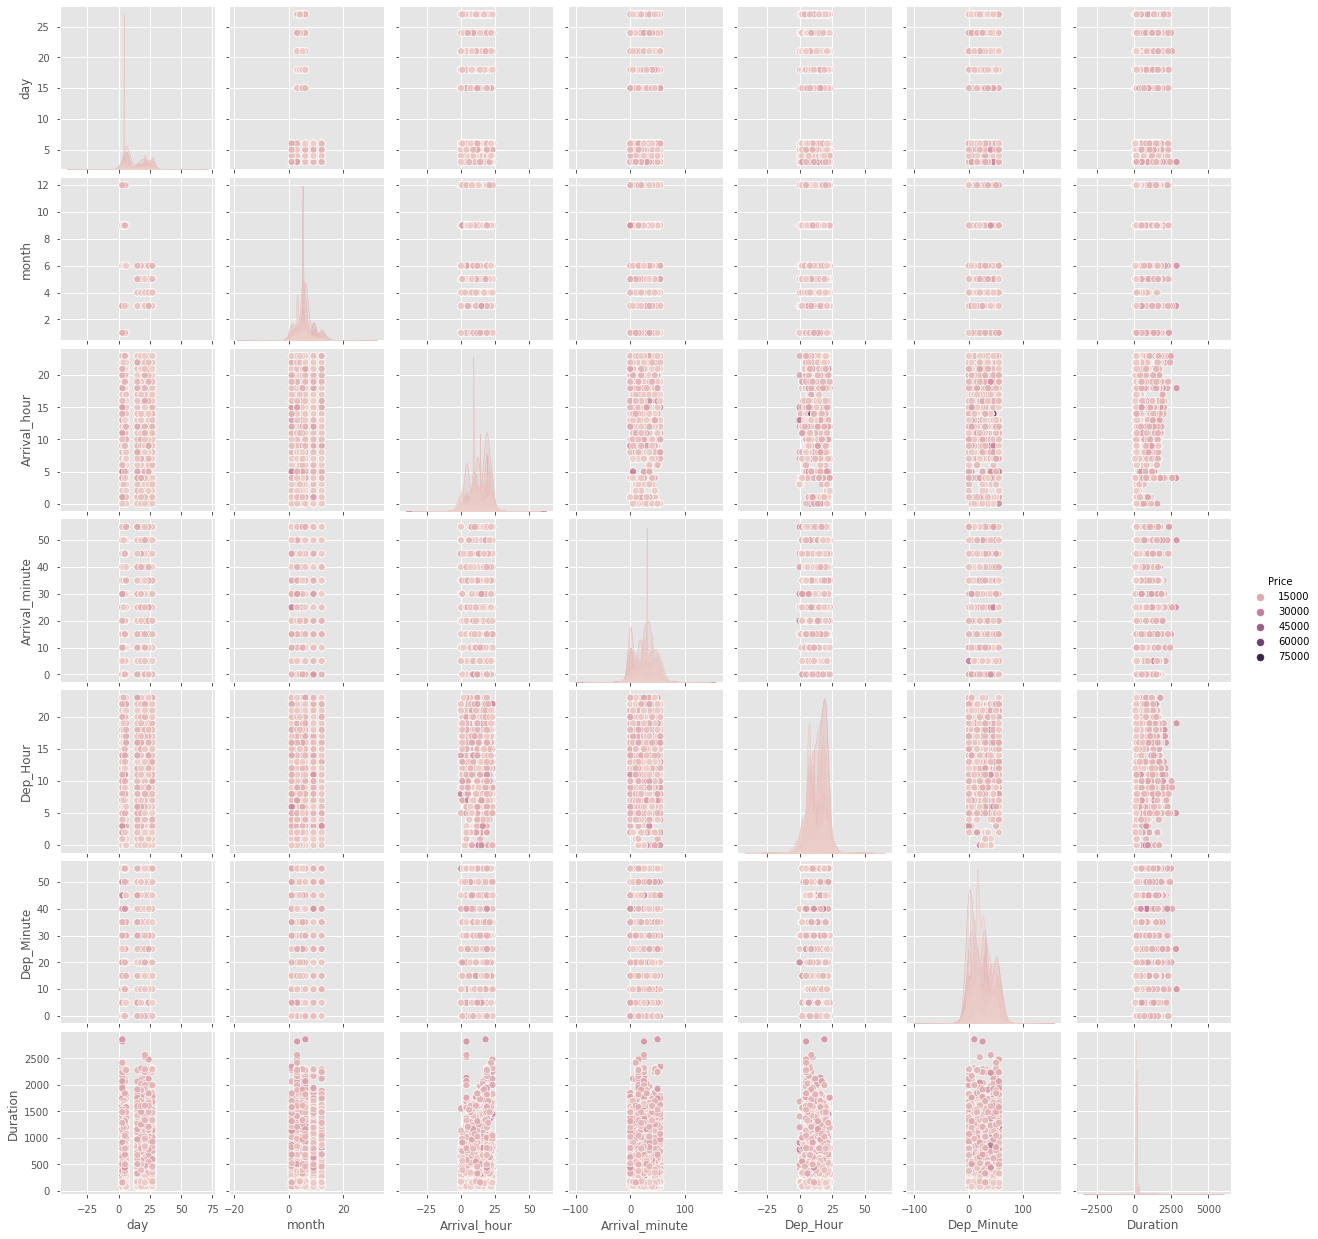

In [449]:
sns.pairplot(df,hue='Price')

## Feature Engineering

In [64]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'day',
       'month', 'Arrival_hour', 'Arrival_minute', 'Dep_Hour', 'Dep_Minute',
       'Duration'],
      dtype='object')

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le=LabelEncoder()


In [67]:
df[['Airline','Source','Destination','Total_Stops']]=df[['Airline','Source','Destination','Total_Stops']].apply(le.fit_transform)

In [68]:
df

,Airline,Source,Destination,Total_Stops,Price,day,month,Arrival_hour,Arrival_minute,Dep_Hour,Dep_Minute,Duration
0,3,0,2,4,3897,24,3,1,10,22,20,170
1,1,3,0,1,7662,5,1,13,15,5,50,445
2,4,2,1,1,13882,6,9,4,25,9,25,1140
3,3,3,0,0,6218,5,12,23,30,18,5,325
4,3,0,2,0,13302,3,1,21,35,16,50,285
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,4107,4,9,22,25,19,55,150
10679,1,3,0,4,4145,27,4,23,20,20,45,155
10680,4,0,2,4,7229,27,4,11,20,8,20,180
10681,10,0,2,4,12648,3,1,14,10,11,30,160


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10461 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Airline         10461 non-null  int64
 1   Source          10461 non-null  int64
 2   Destination     10461 non-null  int64
 3   Total_Stops     10461 non-null  int64
 4   Price           10461 non-null  int64
 5   day             10461 non-null  int64
 6   month           10461 non-null  int64
 7   Arrival_hour    10461 non-null  int64
 8   Arrival_minute  10461 non-null  int64
 9   Dep_Hour        10461 non-null  int64
 10  Dep_Minute      10461 non-null  int64
 11  Duration        10461 non-null  int64
dtypes: int64(12)
memory usage: 1.3 MB


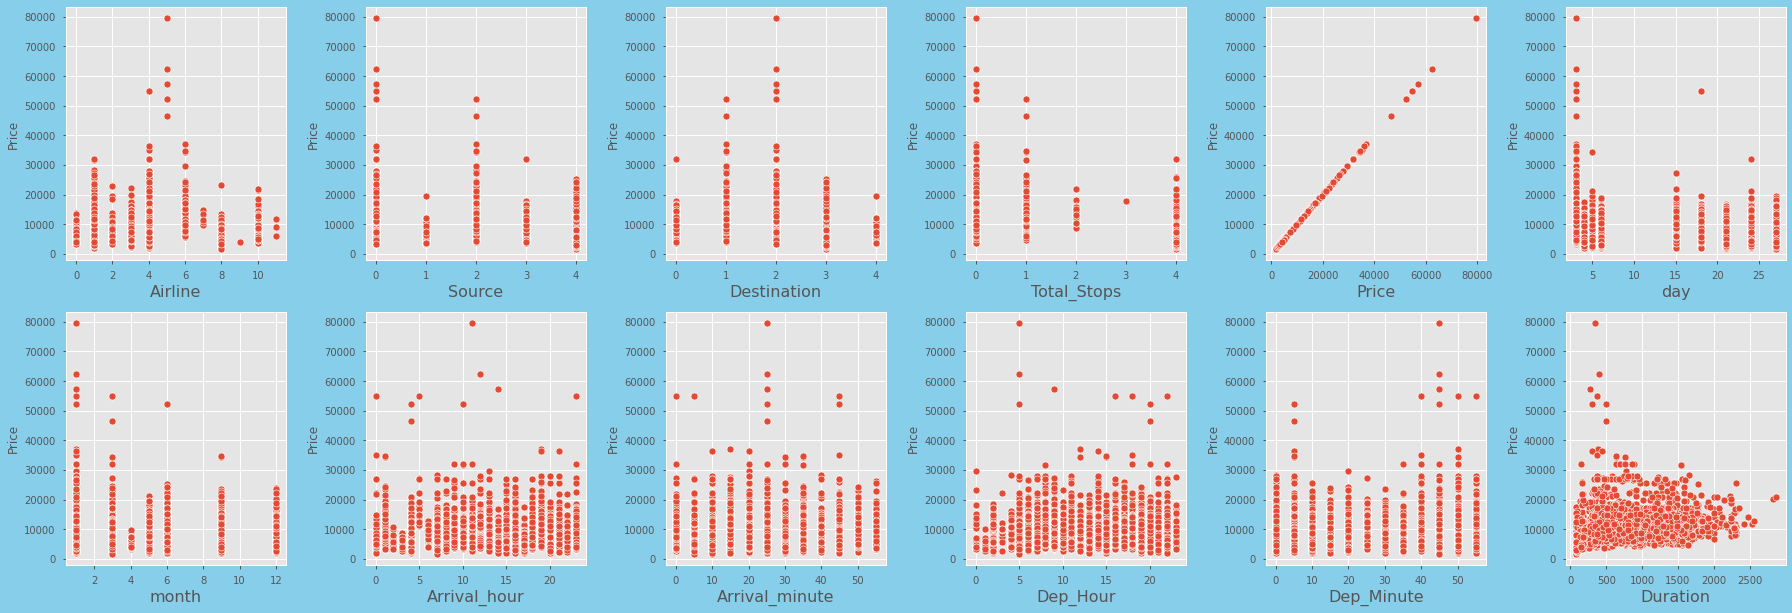

In [72]:
plt.figure(figsize=(25,25),facecolor='skyblue')

plotnumber=1
for column in df:
    if plotnumber <= 36:
        ax=plt.subplot(6,6,plotnumber)
        sns.scatterplot(df[column],y=df.Price)
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


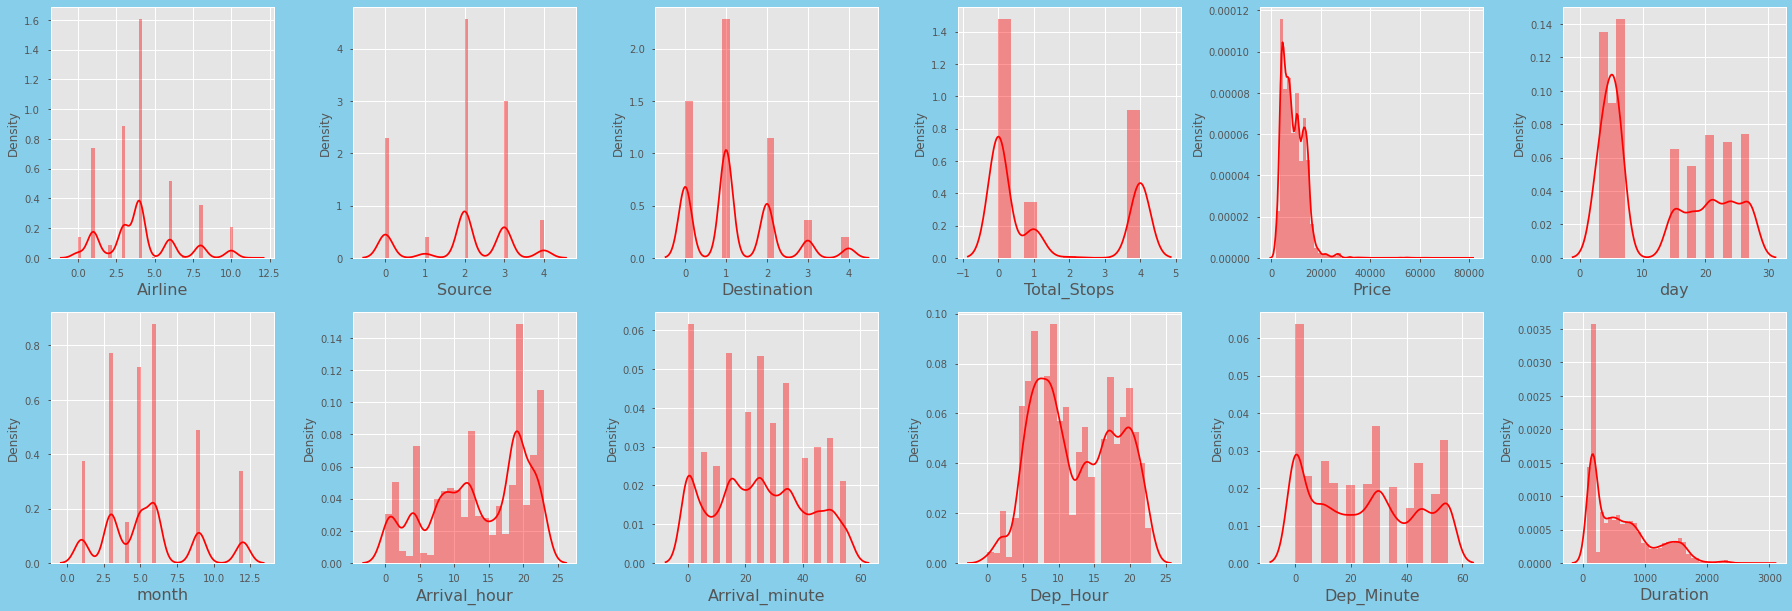

In [70]:
plt.figure(figsize=(25,25),facecolor='skyblue')

plotnumber=1
for column in df:
    if plotnumber <= 36:
        ax=plt.subplot(6,6,plotnumber)
        sns.distplot(df[column],kde=True,color='red')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


### Observation:- clearly Skewness is there in features

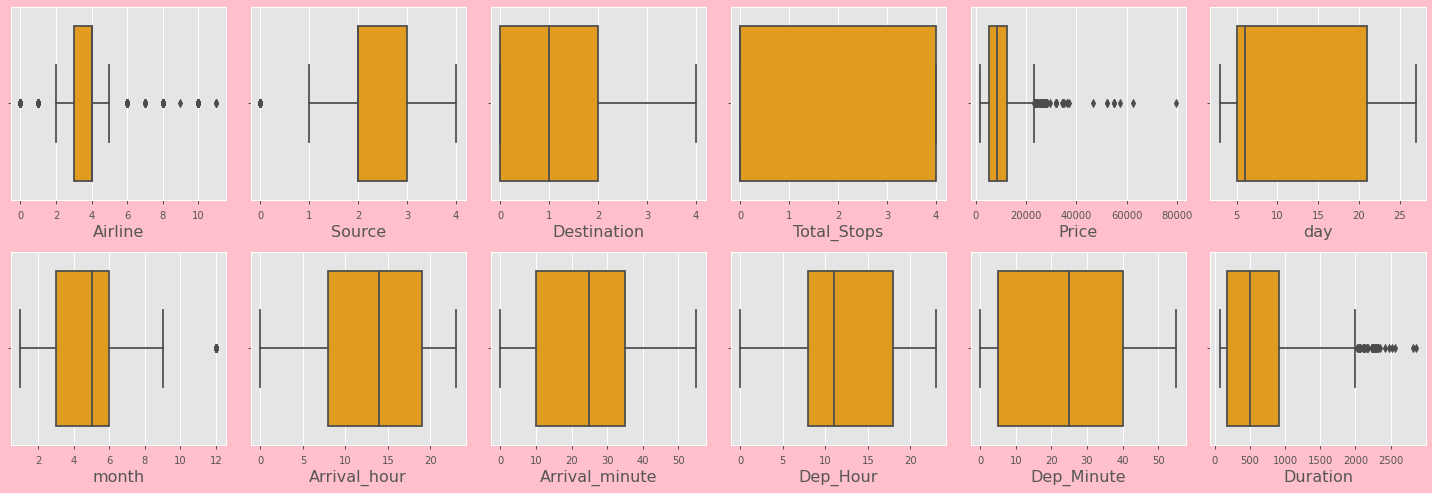

In [71]:
plt.figure(figsize=(20,20),facecolor='pink')

plotnumber=1
for column in df:
    if plotnumber <= 36:
        ax=plt.subplot(6,6,plotnumber)
        sns.boxplot(df[column],color='orange')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


# Observation:- claerly outliers are there in features

In [73]:
## importing  zscore 
from scipy.stats import zscore
df.shape

(10461, 12)

In [75]:
df1=df[np.abs(zscore(df)<3).all(axis=1)]

In [76]:
df1.shape

(10305, 12)

### Observation:- Around 30 percent data is removed so it is not acceptable

In [77]:
df1.skew()

Airline           0.721823
Source           -0.433181
Destination       0.847416
Total_Stops       0.601295
Price             0.442586
day               0.363755
month             0.635015
Arrival_hour     -0.372221
Arrival_minute    0.107161
Dep_Hour          0.099550
Dep_Minute        0.175836
Duration          0.818734
dtype: float64

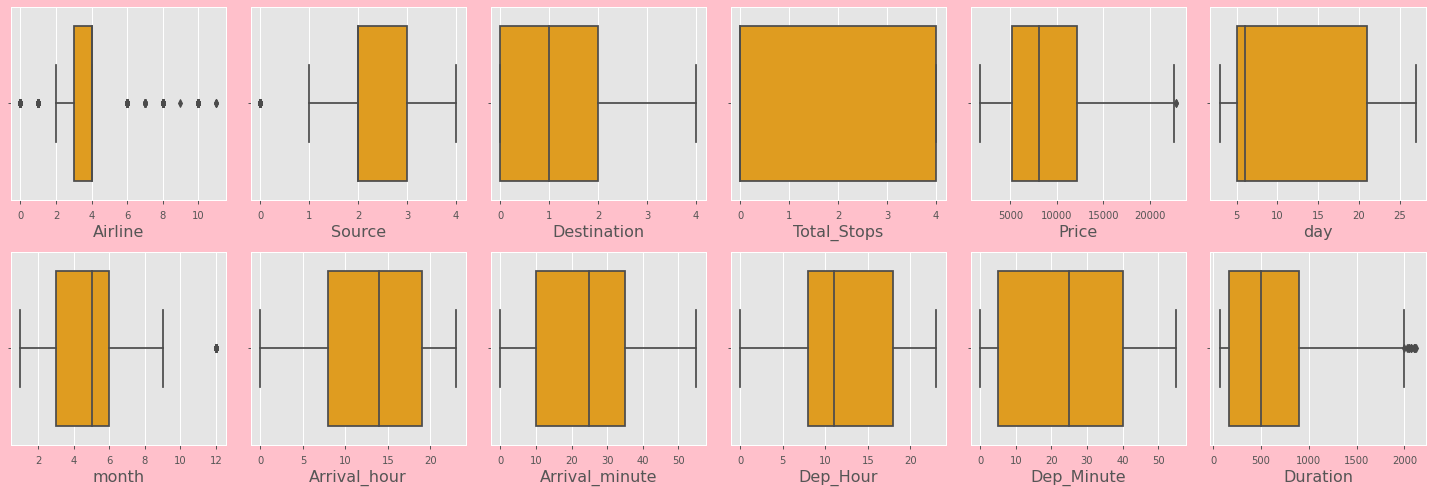

In [110]:
plt.figure(figsize=(20,20),facecolor='pink')

plotnumber=1
for column in df1:
    if plotnumber <= 36:
        ax=plt.subplot(6,6,plotnumber)
        sns.boxplot(df1[column],color='orange')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


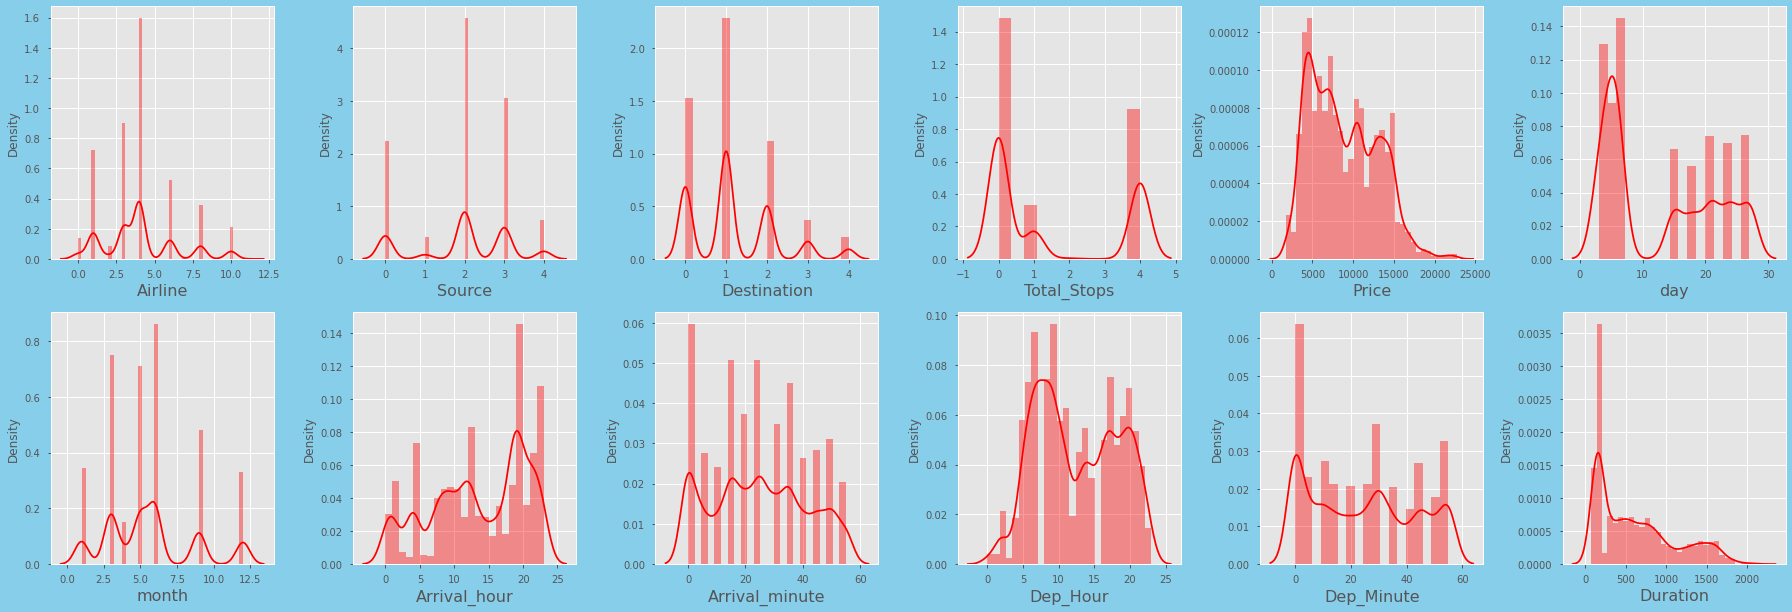

In [111]:
plt.figure(figsize=(25,25),facecolor='skyblue')

plotnumber=1
for column in df1:
    if plotnumber <= 36:
        ax=plt.subplot(6,6,plotnumber)
        sns.distplot(df1[column],kde=True,color='red')
        plt.xlabel(column,fontsize=16)
    plotnumber=plotnumber+1
    
plt.tight_layout()


<AxesSubplot:>

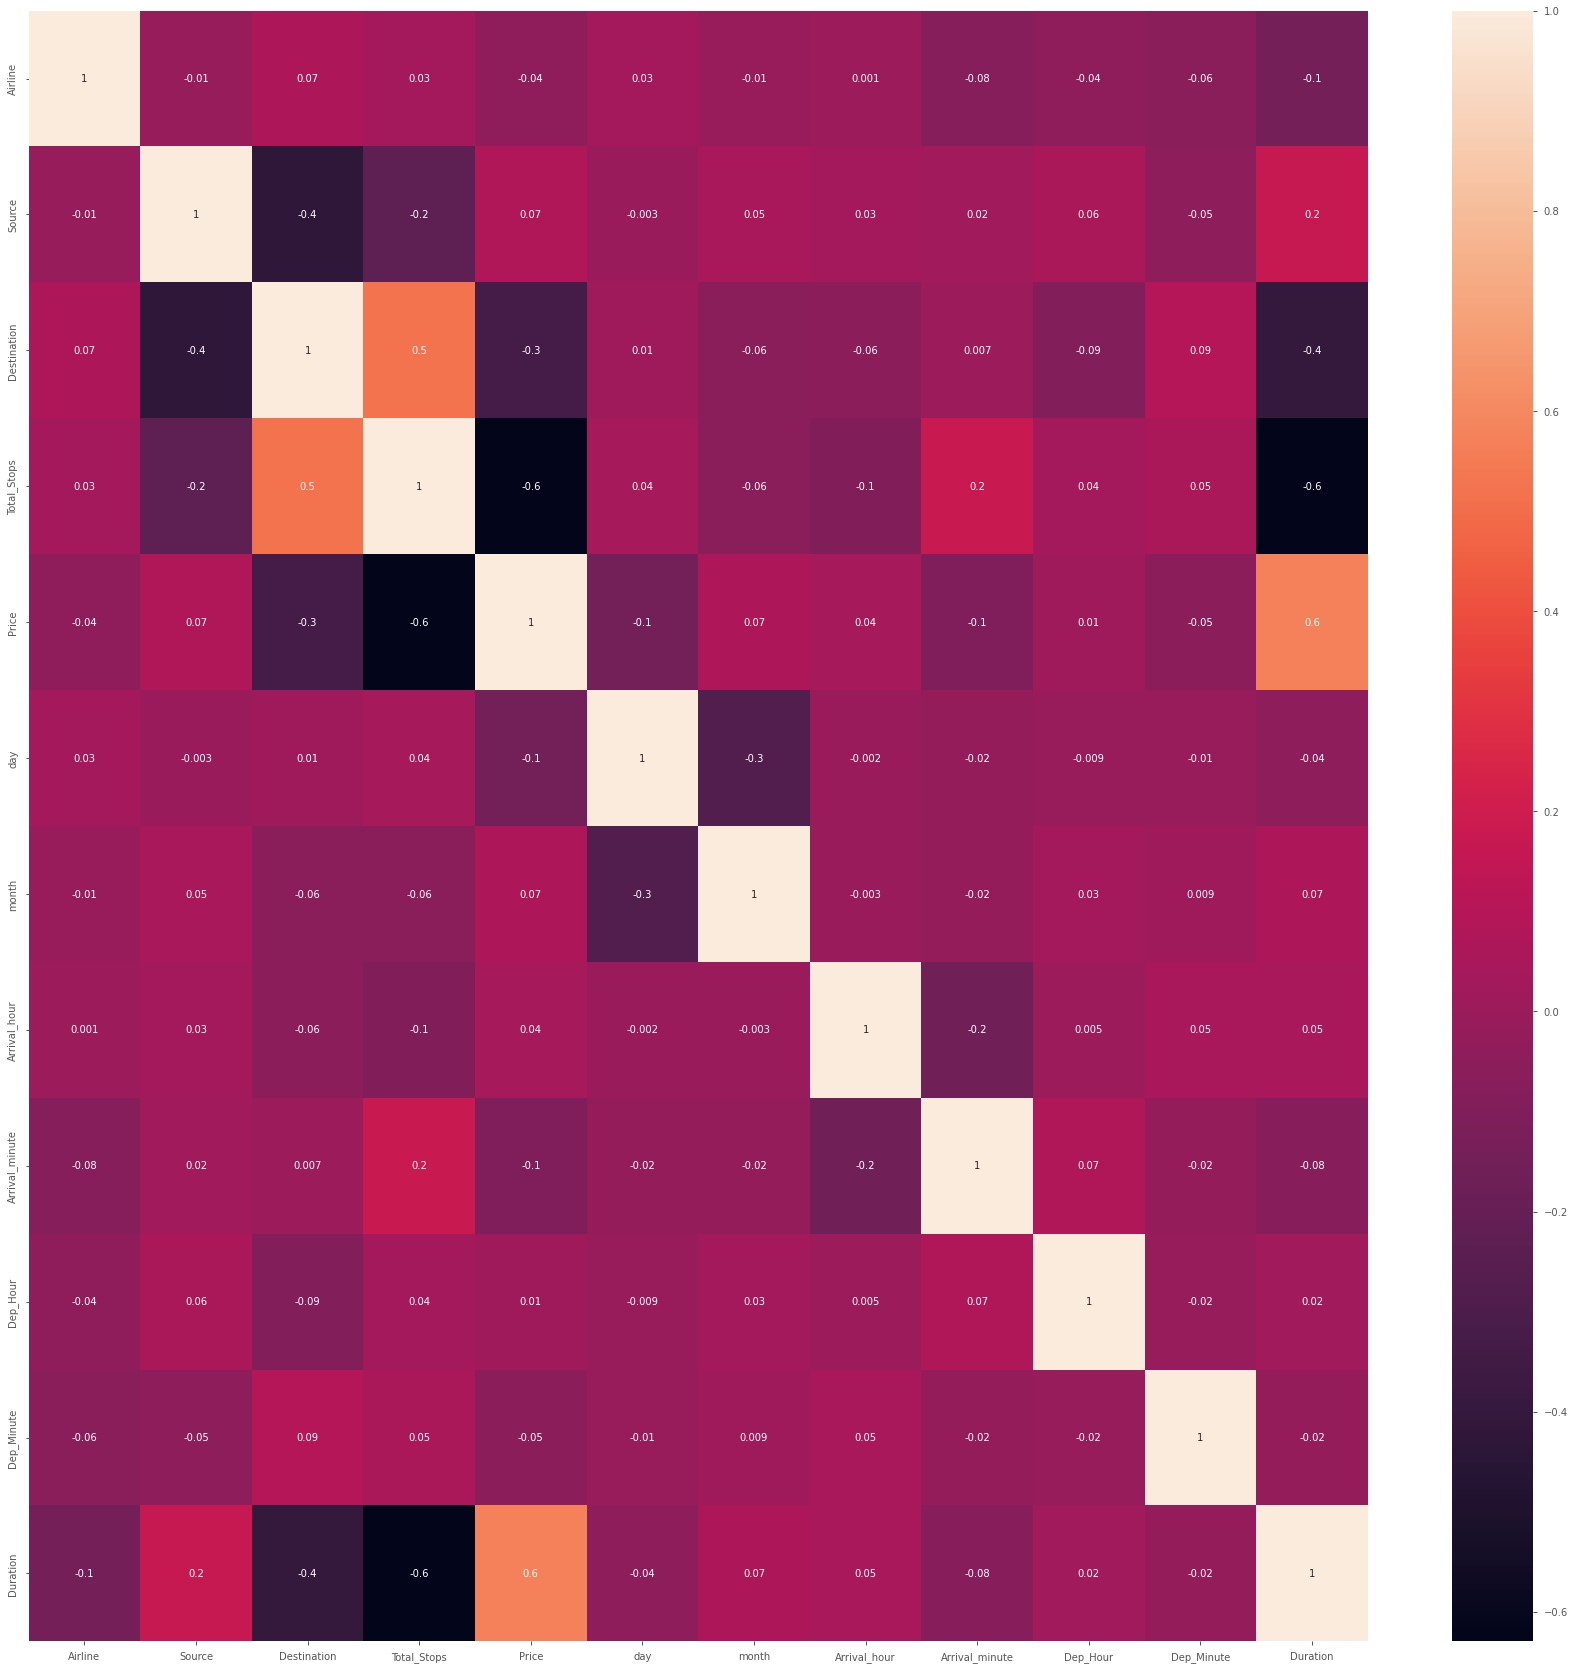

In [112]:
plt.figure(figsize=(30,30))
sns.heatmap(df1.corr(),annot=True,annot_kws={'size':10},fmt='.1g')


### Observation:- Since many features having multicolinearity problem so we have to check vif 

In [81]:
X=df1.drop('Price',axis=1)
y=df1.Price

<AxesSubplot:title={'center':'Correlation with Target'}>

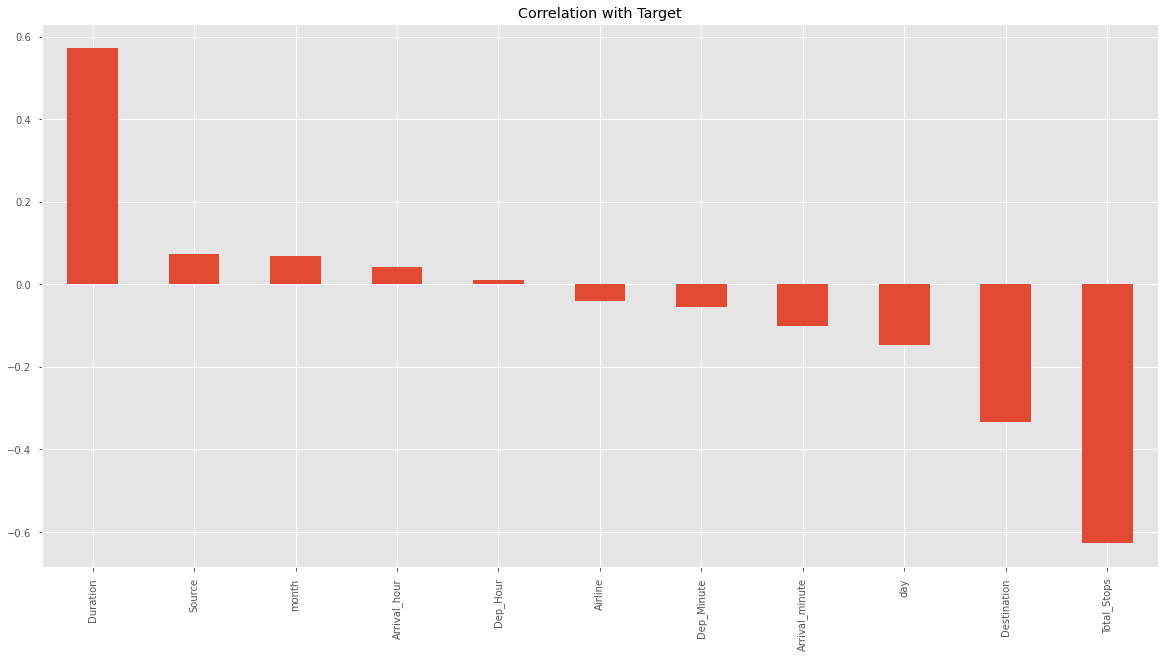

In [82]:
plt.figure(figsize=(20,10))
X.corrwith(y).sort_values(ascending=False).plot(kind='bar',grid=True,title='Correlation with Target')


In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler=StandardScaler()

In [85]:
x_scaled=scaler.fit_transform(X)


In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=X.columns
vif


,vif,features
0,1.039905,Airline
1,1.231992,Source
2,1.643833,Destination
3,2.031808,Total_Stops
4,1.088231,day
5,1.092757,month
6,1.033936,Arrival_hour
7,1.077205,Arrival_minute
8,1.026028,Dep_Hour
9,1.018613,Dep_Minute


### Observation:- Since it has not  multicolinearity problem.

In [91]:
# Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


In [92]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=41)


In [93]:
def model(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        ypred=clf.predict(x_train)
        print('Traning r2_score: ',r2_score(y_train,ypred)*100)
    elif train==False:
        y_pred=clf.predict(x_test)
        print('The testing Score-',r2_score(y_test,y_pred)*100)
        print('MSE: ',mean_squared_error(y_test,y_pred))
        print('MAE: ',mean_absolute_error(y_test,y_pred))
        print('RMSE ',np.sqrt(mean_squared_error(y_test,y_pred)))


In [94]:
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [95]:
model(lr,x_train,x_test,y_train,y_test,train = True)

Traning r2_score:  46.322207082966635


In [96]:
model(lr,x_train,x_test,y_train,y_test,train = False)

The testing Score- 47.63684715777884
MSE:  8472629.505628074
MAE:  2277.7839499744537
RMSE  2910.778161527957


### Random Forest

In [97]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [98]:
model(rf,x_train,x_test,y_train,y_test,train = True)

Traning r2_score:  94.81532003069006


In [99]:
model(rf,x_train,x_test,y_train,y_test,train =False)

The testing Score- 80.82973578606881
MSE:  3101848.1010691887
MAE:  1149.2787321236087
RMSE  1761.2064334055758


In [101]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rf,x_scaled,y,cv=5).mean())

0.8036787458075871


### XGBoost

In [102]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [103]:
model(xgb,x_train,x_test,y_train,y_test,train = True)

Traning r2_score:  92.57912106104183


In [104]:
model(xgb,x_train,x_test,y_train,y_test,train = False)

The testing Score- 83.97674906556605
MSE:  2592645.0428268174
MAE:  1115.9951487353571
RMSE  1610.169259061549


In [106]:
print(cross_val_score(xgb,x_scaled,y,cv=5).mean())

0.8414264975749728


### SVM

In [107]:
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [115]:
model(svr,x_train,x_test,y_train,y_test,train = False)

The testing Score- 7.290883310384544
MSE:  15000815.551958136
MAE:  3212.1733043284867
RMSE  3873.0886320813956


### KNN

In [113]:
knn=KNeighborsRegressor()
knn=knn.fit(x_train,y_train)

In [116]:
model(knn,x_train,x_test,y_train,y_test,train = True)

Traning r2_score:  78.95503247135147


In [117]:
model(knn,x_train,x_test,y_train,y_test,train = False)

The testing Score- 69.03691371711196
MSE:  5009987.828963911
MAE:  1609.7743888242142
RMSE  2238.3002097493336


In [118]:
print(cross_val_score(knn,x_scaled,y,cv=5).mean())

0.6833178368783324


# Conclusion:- XGBoost is better performing model with 84 percent of r2_score and 84 percent of cross_val_score

In [120]:
### Hyperparameter tunning
from sklearn.model_selection import GridSearchCV

In [122]:
params={'learning_rate':[0.001,0.1,0.003,0.02],
       'n_estimators':[100],
       'max_depth':[1,2,3,4,5,6,7,8,9],}


In [124]:
gs=GridSearchCV(xgb,param_grid=params,n_jobs=-1)
gs.fit(x_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_to_onehot=4, max_delta_step=0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
   

In [125]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

In [126]:
xgb=XGBRegressor(learning_rate=0.1,max_depth=7,n_estimators=100)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [127]:
model(xgb,x_train,x_test,y_train,y_test,train = True)

Traning r2_score:  91.29373854508783


In [128]:
model(xgb,x_train,x_test,y_train,y_test,train = False)

The testing Score- 84.86767774290811
MSE:  2448488.1655317573
MAE:  1105.949104164014
RMSE  1564.7645719186505


In [129]:
print(cross_val_score(xgb,x_scaled,y,cv=5).mean())


0.8465211786872242


In [130]:
y_pred=xgb.predict(x_test)


In [131]:
Report=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})


In [132]:
Report

,Actual,Predicted
6211,4226,4821.579102
1950,14781,11867.653320
2479,8610,8805.383789
6184,9663,11825.936523
7687,7564,8851.199219
...,...,...
3633,8541,7295.898438
7717,9663,11431.979492
6897,13399,14014.954102
7816,6587,6755.420898


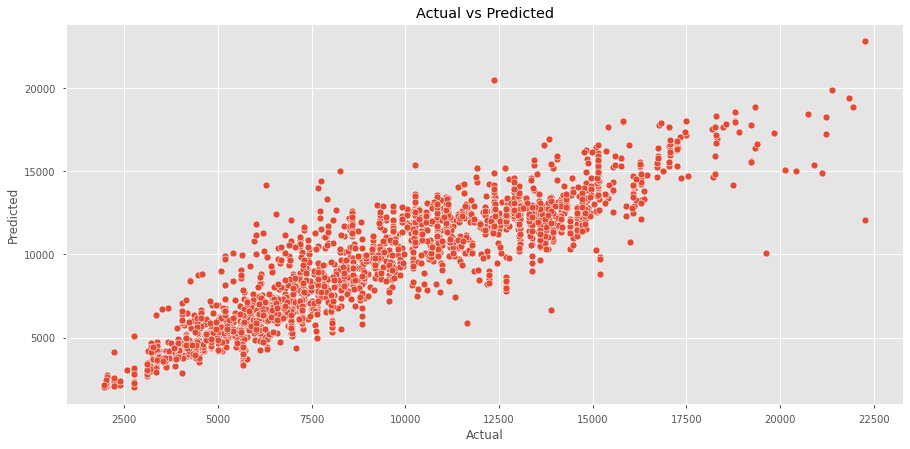

In [133]:
plt.figure(figsize=(15,7))
sns.scatterplot(y_test,y_pred,palette="deep")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


# Saving the model

In [135]:
import pickle
filename='Flight price'
pickle.dump(xgb,open(filename,'wb'))


In [164]:
df2=pd.read_excel('Test_set.xlsx')

In [165]:
df2

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [166]:
df2[df2.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
294,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,No info
794,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,In-flight meal not included
909,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,20:00,22:55,2h 55m,non-stop,No info
974,Air India,12/06/2019,Kolkata,Banglore,CCU → DEL → AMD → BLR,07:00,05:25 13 Jun,22h 25m,2 stops,No info
1011,Jet Airways,9/05/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 10 May,22h 55m,2 stops,No info
1033,Multiple carriers,15/05/2019,Delhi,Cochin,DEL → BOM → COK,07:30,19:15,11h 45m,1 stop,No info
1044,GoAir,24/03/2019,Banglore,New Delhi,BLR → DEL,20:55,23:50,2h 55m,non-stop,No info
1233,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,No info
1504,Air India,15/06/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 16 Jun,21h 15m,2 stops,No info
1537,Jet Airways,6/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,06:45,04:25 07 Jun,21h 40m,2 stops,In-flight meal not included


In [167]:
df2.drop_duplicates(keep='first',inplace=True)

In [168]:
df2.shape

(2645, 10)

In [169]:
df2['Destination']=df2['Destination'].replace('New Delhi','Delhi')

In [170]:
df2['Date_of_Journey']=pd.to_datetime(df2['Date_of_Journey'])
df2['day']=df2['Date_of_Journey'].dt.day
df2['month']=df2['Date_of_Journey'].dt.month

In [171]:
df2.drop('Date_of_Journey',axis=1,inplace=True)

In [172]:
df2.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day,month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [173]:
df2['Dep_Time']=pd.to_datetime(df2['Dep_Time'])
df2['Arrival_Time']=pd.to_datetime(df2['Arrival_Time'])

In [174]:
df2['Arrival_hour']=df2['Arrival_Time'].dt.hour
df2['Arrival_minute']=df2['Arrival_Time'].dt.minute
df2['Dep_hour']=df2['Dep_Time'].dt.hour
df2['Dep_minute']=df2['Dep_Time'].dt.minute

In [175]:
df2.drop(columns=['Arrival_Time','Dep_Time'],axis=1,inplace=True)

In [176]:
df2

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,day,month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,21,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2,45,23,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,6,6,20,25,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,27,3,16,55,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,3,6,4,25,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,3,6,19,15,4,0


In [177]:
l=[]
l1=[]
for i in df2['Duration']:
    y=i.replace("h"," ").replace("m"," ").split()
    z=int(y[0])*60
    l.append(z)
    try:
        z1=int(y[1])
        l1.append(z1)
    except IndexError:
        l1.append(0)


In [178]:
duration=pd.DataFrame({'l':l,'l1':l1})
duration

,l,l1
0,600,55
1,240,0
2,1380,45
3,780,0
4,120,50
...,...,...
2640,1380,55
2641,120,35
2642,360,35
2643,900,15


In [180]:
duration['Totalminute']=duration['l']+duration['l1']

In [181]:
duration.drop(columns=['l','l1'],axis=1,inplace=True)

In [182]:
df2.drop('Duration',axis=1,inplace=True)

In [183]:
df2['Duration']=duration['Totalminute']

In [184]:
df2

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,day,month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,4,25,17,30,655.0
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,10,20,6,20,240.0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,0,19,15,1425.0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,21,0,8,0,780.0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2,45,23,55,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,6,6,20,25,20,30,NaN
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,27,3,16,55,14,20,NaN
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,3,6,4,25,21,50,NaN
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,3,6,19,15,4,0,NaN


In [185]:
df2['Total_Stops'].value_counts()

1 stop      1427
non-stop     846
2 stops      360
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [186]:
df2.drop(columns=['Route','Additional_Info'],axis=1,inplace=True)

In [187]:
df2.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'day', 'month',
       'Arrival_hour', 'Arrival_minute', 'Dep_hour', 'Dep_minute', 'Duration'],
      dtype='object')

In [188]:
df2[['Airline','Source','Destination','Total_Stops']]=df2[['Airline','Source','Destination','Total_Stops']].apply(le.fit_transform)

In [189]:
df2

,Airline,Source,Destination,Total_Stops,day,month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration
0,4,2,1,0,6,6,4,25,17,30,655.0
1,3,3,0,0,5,12,10,20,6,20,240.0
2,4,2,1,0,21,5,19,0,19,15,1425.0
3,6,2,1,0,21,5,21,0,8,0,780.0
4,0,0,2,4,24,6,2,45,23,55,170.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,0,6,6,20,25,20,30,NaN
2667,3,3,0,4,27,3,16,55,14,20,NaN
2668,4,2,1,0,3,6,4,25,21,50,NaN
2669,1,2,1,0,3,6,19,15,4,0,NaN


In [190]:
df2.isna().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
day                0
month              0
Arrival_hour       0
Arrival_minute     0
Dep_hour           0
Dep_minute         0
Duration          26
dtype: int64

In [192]:
df2.dropna(axis=0,inplace=True)

In [193]:
df2

,Airline,Source,Destination,Total_Stops,day,month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration
0,4,2,1,0,6,6,4,25,17,30,655.0
1,3,3,0,0,5,12,10,20,6,20,240.0
2,4,2,1,0,21,5,19,0,19,15,1425.0
3,6,2,1,0,21,5,21,0,8,0,780.0
4,0,0,2,4,24,6,2,45,23,55,170.0
...,...,...,...,...,...,...,...,...,...,...,...
2640,3,0,2,4,24,5,13,0,10,10,1435.0
2641,6,2,1,0,5,9,1,30,14,0,155.0
2642,4,2,1,0,21,5,12,35,22,50,395.0
2643,1,2,1,1,6,6,9,25,9,45,915.0


In [205]:
x=scaler.fit_transform(df2)

In [206]:
loaded_model = pickle.load(open(filename, 'rb'))


In [207]:
pred=loaded_model.predict(x)

In [209]:
price=pd.DataFrame(pred,columns=['Price'])

In [210]:
price

,Price
0,11834.746094
1,4694.585449
2,13952.720703
3,10890.281250
4,3739.418701
...,...
2614,7797.604980
2615,4921.530762
2616,13253.002930
2617,11334.810547


,0,Price
0,11834.746094,11834.746094
1,4694.585449,4694.585449
2,13952.720703,13952.720703
3,10890.281250,10890.281250
4,3739.418701,3739.418701
...,...,...
2614,7797.604980,7797.604980
2615,4921.530762,4921.530762
2616,13253.002930,13253.002930
2617,11334.810547,11334.810547
